<a href="https://colab.research.google.com/github/AmirJlr/LinearProgramming/blob/master/LP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Linear Programming in python

###What Is Linear Programming?
Imagine that you have a system of **linear equations and inequalities**. Such systems often have **many possible solutions**. Linear programming is a set of mathematical and computational tools that allows you to **find a particular solution to this system that corresponds to the maximum or minimum** of some other linear function.

--------------

It’s worth mentioning that almost all widely used linear programming and mixed-integer linear programming libraries are native to and written in Fortran or C or C++. This is because linear programming requires computationally intensive work with (often large) matrices. Such libraries are called **solvers**. The Python tools are just wrappers around the solvers.


--------------


Basically, when you define and solve a model, you use Python functions or methods to call a low-level library that does the actual optimization job and returns the solution to your Python object.

Several free Python libraries are specialized to interact with linear or mixed-integer linear programming solvers:

- SciPy Optimization and Root Finding
- PuLP
- Cplex
- Pyomo
- CVXOPT
- ...

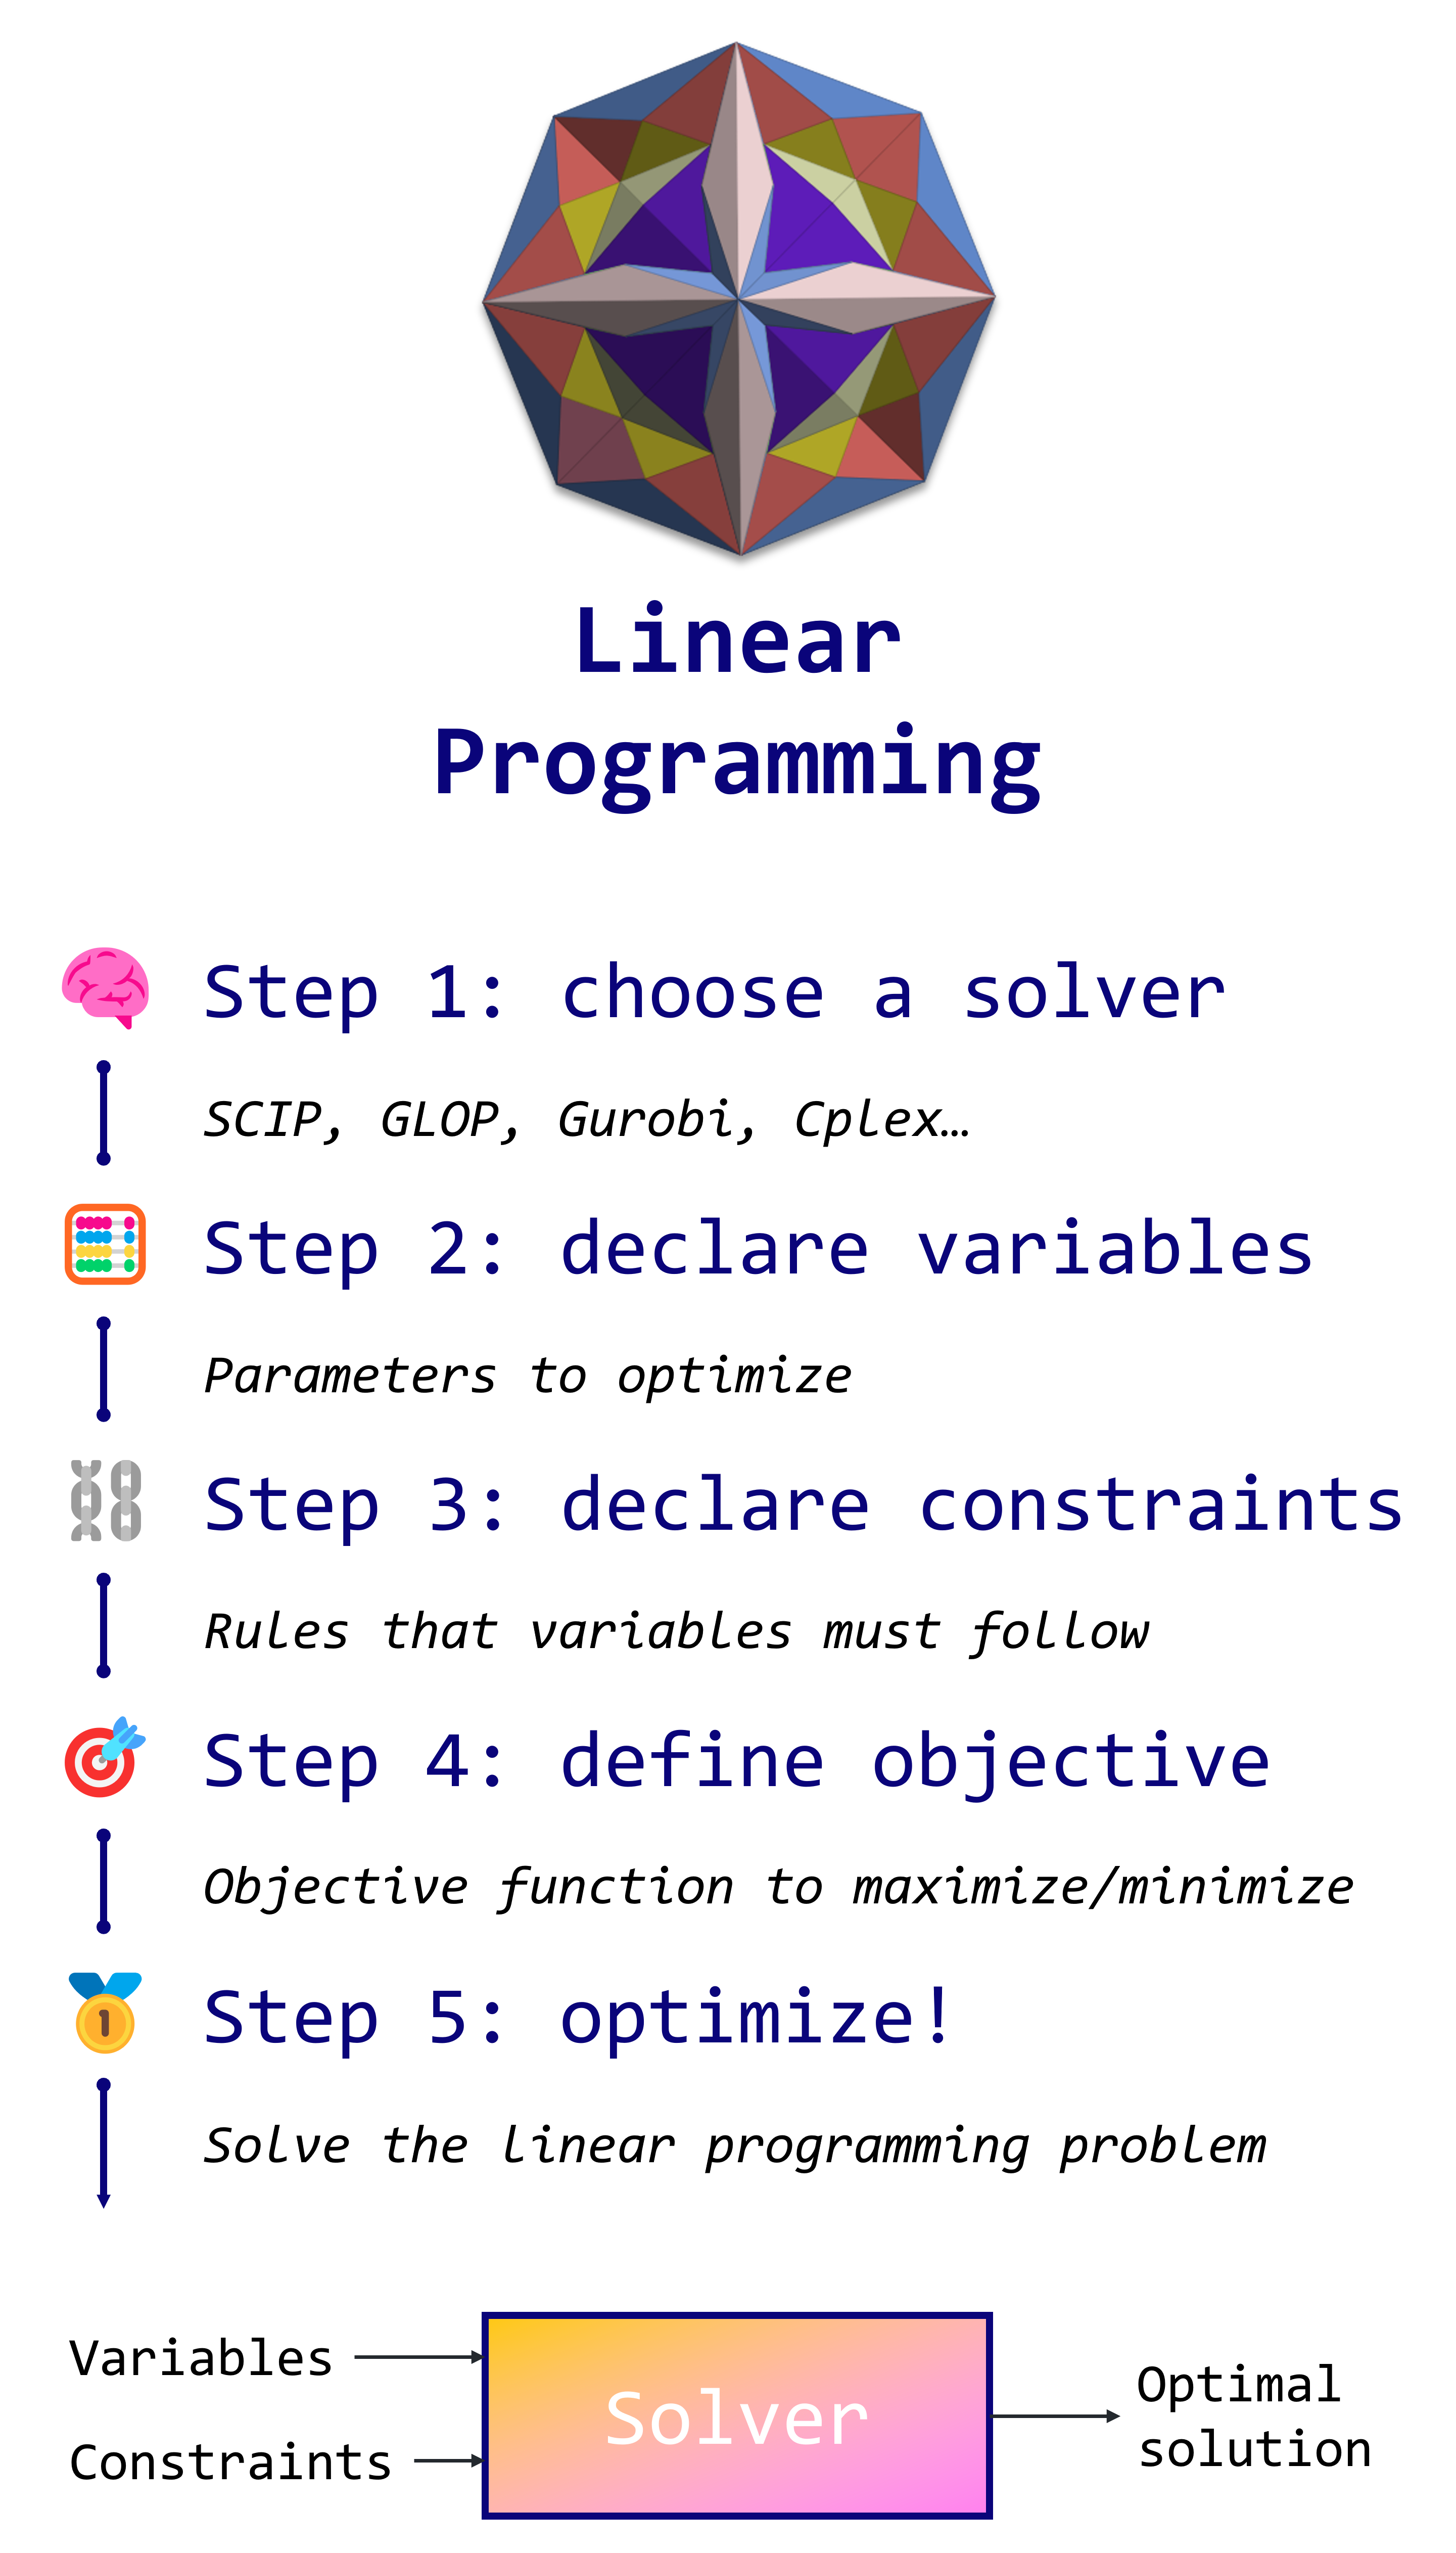

In [ ]:
from IPython.display import Image
Image(filename='Intro.png')

**Solvers :**
- In Python, there are different libraries for linear programming such as the multi-purposed SciPy, the beginner-friendly PuLP, the exhaustive Pyomo, and many others.

- All these libraries have a hidden benefit: they act as interfaces to use the same model with different solvers. Solvers like Gurobi, Cplex, or SCIP have their own APIs, but the models they create are tied to a specific solver.


**Variables :**
- continuous variables
- integer variables
- boolean variables

We then need to specify lower and upper bounds for these variables

<video controls src="solvers.mp4" />

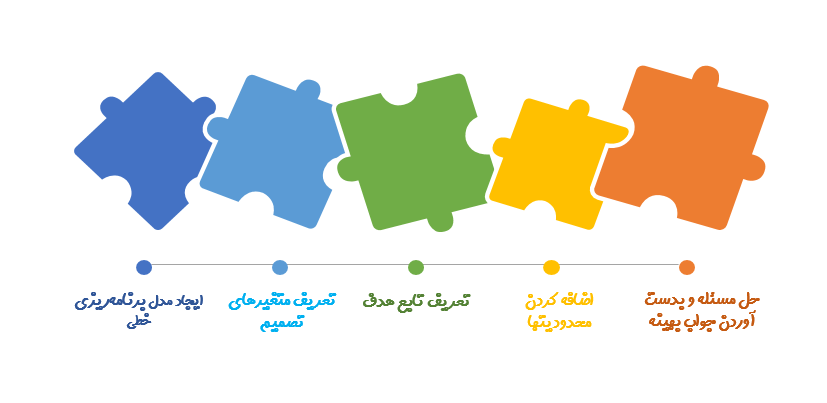

In [ ]:
from IPython.display import Image
Image(filename='pipeline.png')

# First Section

In this section, we’ll see two examples of linear programming problems:

- A **small problem** that illustrates what linear programming is

- A practical problem related to **resource allocation** that illustrates linear programming concepts in a real-world scenario

Consider the following linear programming problem:

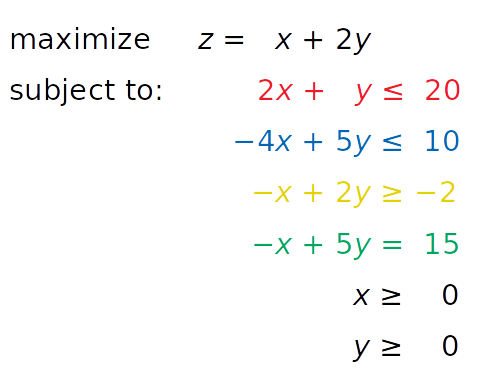

In [ ]:
from IPython.display import Image
Image(filename='1.png')

**linprog() solves only minimization (not maximization)** problems and doesn’t allow inequality constraints with the greater than or equal to sign (≥). To work around these issues, you need to modify your problem before starting optimization:


- Instead of maximizing z = x + 2y, you can minimize its negative(−z = −x − 2y).
- Instead of having the greater than or equal to sign, you can multiply the yellow inequality by −1 and get the opposite less than or equal to sign (≤).


- After introducing these changes, you get a **new system**:

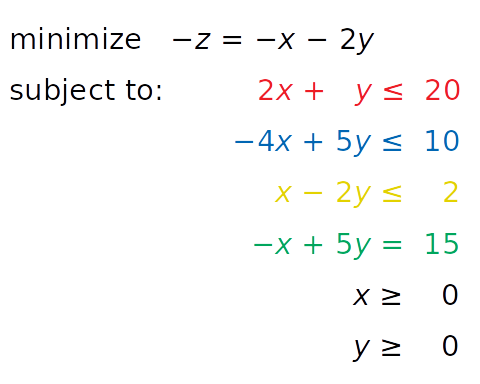

In [ ]:
from IPython.display import Image
Image(filename='1-1.png')

## Solve Using Scipy

In [ ]:
from scipy.optimize import linprog

In [ ]:
obj = [-1, -2]
#      ─┬  ─┬
#       │   └┤ Coefficient for y
#       └────┤ Coefficient for x

lhs_ineq = [[ 2,  1],  # Red constraint left side
            [-4,  5],  # Blue constraint left side
            [ 1, -2]]  # Yellow constraint left side

rhs_ineq = [20,  # Red constraint right side
            10,  # Blue constraint right side
             2]  # Yellow constraint right side

lhs_eq = [[-1, 5]]  # Green constraint left side
rhs_eq = [15]       # Green constraint right side

In [ ]:
bnd = [(0, float("inf")),  # Bounds of x
       (0, float("inf"))]  # Bounds of y

In [ ]:
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq,
              A_eq=lhs_eq, b_eq=rhs_eq, bounds=bnd,
              method="revised simplex")

opt

<ipython-input-8-0b4dae1e829f>:1: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq,


 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -16.818181818181817
       x: [ 7.727e+00  4.545e+00]
     nit: 3

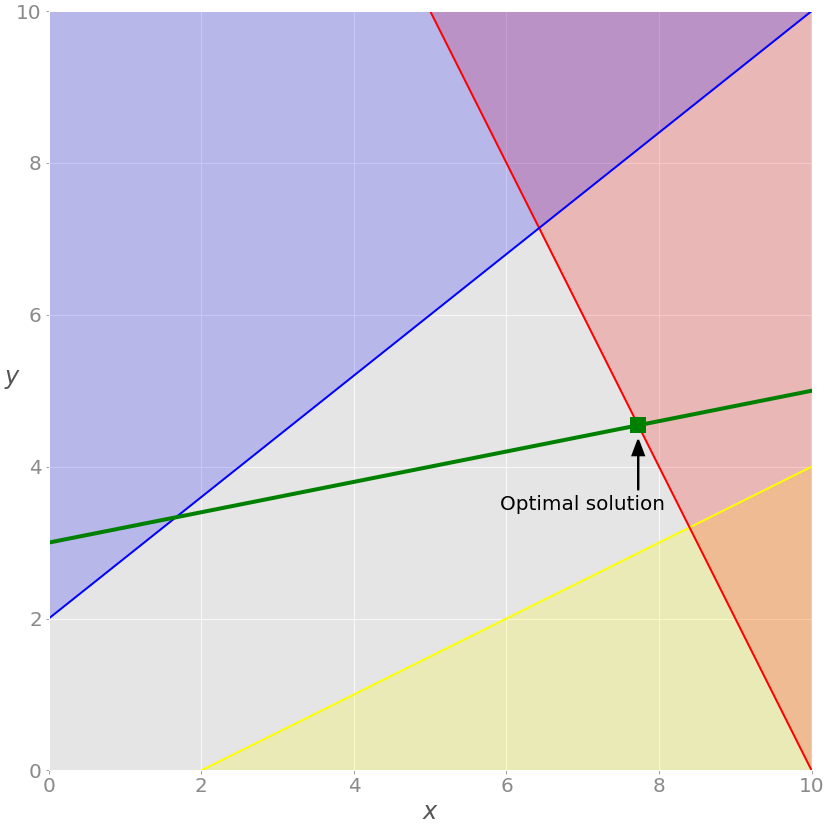

In [ ]:
from IPython.display import Image
Image(filename='1-2.png')

- SciPy can’t run **various external solvers**.

- SciPy **can’t work with integer decision variables.**

- SciPy doesn’t provide classes or functions that facilitate model building. You have to define arrays and matrices, which might be a tedious and error-prone task for large problems.

- SciPy doesn’t allow you to define maximization problems directly. You must convert them to minimization problems.

- SciPy doesn’t allow you to define constraints using the greater-than-or-equal-to sign directly. You must use the less-than-or-equal-to instead.

## Solve Using Pulp

PuLP has a more convenient linear programming API than SciPy. You don’t have to mathematically modify your problem or use vectors and matrices. Everything is cleaner and less prone to errors.

In [ ]:
!pip install PuLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 12.8 MB/s eta 0:00:00


In [ ]:
from pulp import LpMaximize, LpProblem, LpStatus, lpSum, LpVariable

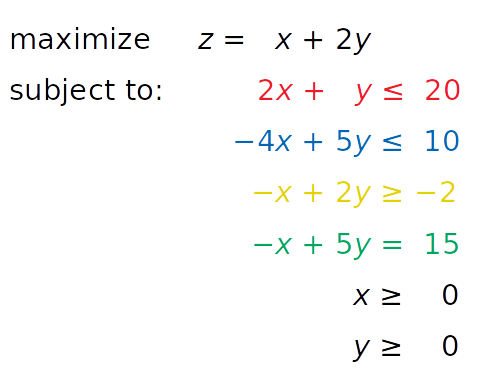

In [ ]:
from IPython.display import Image
Image(filename='1.png')

In [ ]:
# Create the model
model = LpProblem(name="small-problem", sense=LpMaximize)

# Initialize the decision variables
x = LpVariable(name="x", lowBound=0)
y = LpVariable(name="y", lowBound=0)

# Add the constraints to the model
model += (2 * x + y <= 20, "red_constraint")
model += (-4 * x + 5 * y <= 10, "blue_constraint")
model += (-x + 2 * y >= -2, "yellow_constraint")
model += (-x + 5 * y == 15, "green_constraint")

# Add the objective function to the model
obj_func = x + 2 * y
model += obj_func

In [ ]:
model

small-problem:
MAXIMIZE
1*x + 2*y + 0
SUBJECT TO
red_constraint: 2 x + y <= 20

blue_constraint: - 4 x + 5 y <= 10

yellow_constraint: - x + 2 y >= -2

green_constraint: - x + 5 y = 15

VARIABLES
x Continuous
y Continuous

In [ ]:
# Solve the problem
status = model.solve()

In [ ]:
print(f"status: {model.status}, {LpStatus[model.status]}")


print(f"objective: {model.objective.value()}")


for var in model.variables():
    print(f"{var.name}: {var.value()}")


for name, constraint in model.constraints.items():
    print(f"{name}: {constraint.value()}")


status: 1, Optimal
objective: 16.8181817
x: 7.7272727
y: 4.5454545
red_constraint: -9.99999993922529e-08
blue_constraint: -18.181818300000003
yellow_constraint: 3.3636362999999996
green_constraint: -2.0000000233721948e-07


In [ ]:
model.variables()

[x, y]

## Solve Using cplex

In [ ]:
!pip install cplex
!pip install docplex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 MB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 633.5/633.5 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docplex: filename=docplex-2.25.236-py3-none-any.whl size=671351 sha256=669d8becb5fc85ca117d107e07606d451da80c099ba8c1ed7b5b8c4907aedcf5
  Stored in directory: /root/.cache/pip/wheels/3b/e5/00/0bf0173d67188fe73a13e3a61412b3f975f60205e3fab93a69
Successfully built docplex


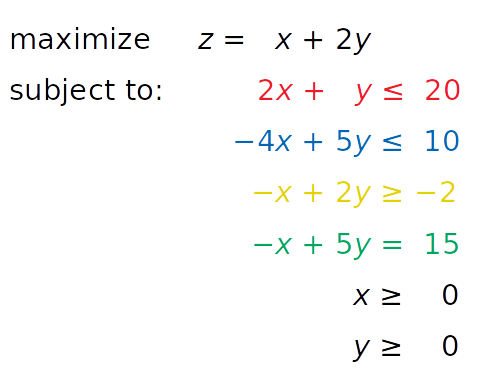

In [ ]:
from IPython.display import Image
Image(filename='1.png')

In [ ]:
from docplex.mp.model import Model

lp = Model()

x = lp.continuous_var()
y = lp.continuous_var()

lp.maximize(x + 2*y)

lp.add_constraint(2*x + y <= 20)
lp.add_constraint(-4*x + 5*y <= 10)
lp.add_constraint(-1*x + 2*y >= -2)
lp.add_constraint(-x + 5 * y == 15)

sol = lp.solve()

if sol:
    print('z:', sol.objective_value)
    print('x:', sol.get_value(x))
    print('y:', sol.get_value(y))
else:
    print('No solution')

z: 16.818181818181817
x: 7.727272727272727
y: 4.545454545454545


- ## Example: Production Problem :


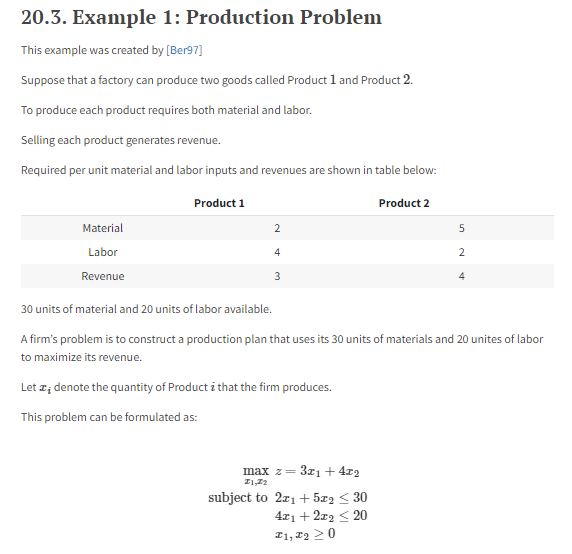

In [ ]:
from IPython.display import Image
Image(filename='PP.png')

In [ ]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
%matplotlib inline

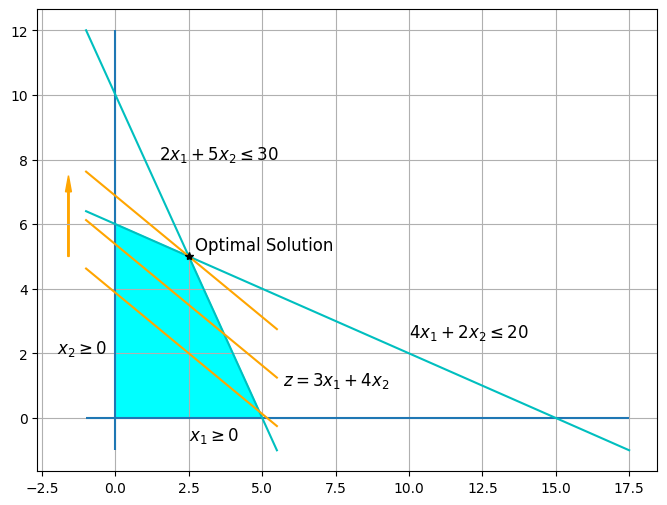

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid()

# Draw constraint lines
ax.hlines(0, -1, 17.5)
ax.vlines(0, -1, 12)

ax.plot(np.linspace(-1, 17.5, 100), 6-0.4*np.linspace(-1, 17.5, 100), color="c")
ax.plot(np.linspace(-1, 5.5, 100), 10-2*np.linspace(-1, 5.5, 100), color="c")

ax.text(1.5, 8, "$2x_1 + 5x_2 \leq 30$", size=12)
ax.text(10, 2.5, "$4x_1 + 2x_2 \leq 20$", size=12)
ax.text(-2, 2, "$x_2 \geq 0$", size=12)
ax.text(2.5, -0.7, "$x_1 \geq 0$", size=12)

# Draw the feasible region
feasible_set = Polygon(np.array([[0, 0],
                                 [0, 6],
                                 [2.5, 5],
                                 [5, 0]]),
                       color="cyan")
ax.add_patch(feasible_set)

# Draw the objective function
ax.plot(np.linspace(-1, 5.5, 100), 3.875-0.75*np.linspace(-1, 5.5, 100), color="orange")
ax.plot(np.linspace(-1, 5.5, 100), 5.375-0.75*np.linspace(-1, 5.5, 100), color="orange")
ax.plot(np.linspace(-1, 5.5, 100), 6.875-0.75*np.linspace(-1, 5.5, 100), color="orange")
ax.arrow(-1.6, 5, 0, 2, width = 0.05, head_width=0.2, head_length=0.5, color="orange")
ax.text(5.7, 1, "$z = 3x_1 + 4x_2$", size=12)

# Draw the optimal solution
ax.plot(2.5, 5, "*", color="black")
ax.text(2.7, 5.2, "Optimal Solution", size=12)

plt.show()

In [ ]:
lp = Model()

x1 = lp.continuous_var()
x2 = lp.continuous_var()

lp.maximize(3*x1 + 4*x2)

lp.add_constraint(2*x1 + 5*x2 <= 30)
lp.add_constraint(4*x1 + 2*x2 <= 20)

sol = lp.solve()

if sol:
    print('z:', sol.objective_value)
    print('x:', sol.get_value(x1))
    print('y:', sol.get_value(x2))
else:
    print('No solution')

z: 27.5
x: 2.5
y: 5.0


## Resource Allocation Problem

Say that a factory produces **four different products**, and that the daily produced amount of the **first product is x₁**, the amount produced of the second product is **x₂**, and so on.

The **goal** is to determine the **profit-maximizing daily production amount for each product**, bearing in mind the following **conditions:**

- The profit per unit of product is $20, $12, $40, and $25 for the first, second, third, and fourth product, respectively.

- Due to manpower constraints, the total number of units produced per day can’t exceed fifty.

- For each unit of the **first product, three units of the raw material A** are consumed. Each unit of the **second product requires two units of the raw material A and one unit of the raw material B**. Each unit of the **third product needs one unit of A and two units of B**. Finally, each unit of the **fourth product requires three units of B**.

- Due to the transportation and storage constraints, the factory can consume up to **one hundred units of the raw material A** and **ninety units of B** per day.

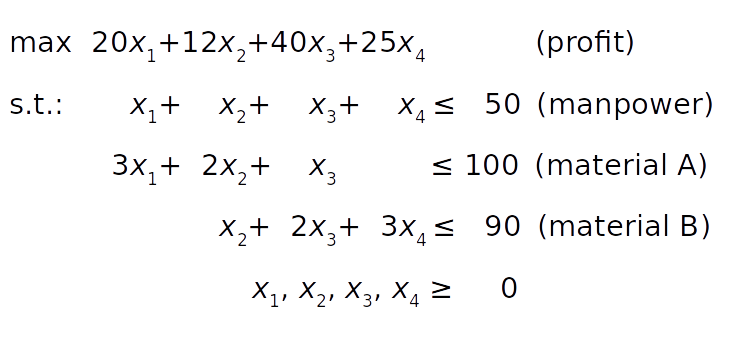

In [ ]:
from IPython.display import Image
Image(filename='RA.png')

- ### SCiPY :

In [ ]:
obj = [-20, -12, -40, -25]

lhs_ineq = [[1, 1, 1, 1],  # Manpower
            [3, 2, 1, 0],  # Material A
            [0, 1, 2, 3]]  # Material B

rhs_ineq = [ 50,  # Manpower
            100,  # Material A
             90]  # Material B

opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq,
              method="revised simplex")

opt

<ipython-input-26-138d1ddcac5c>:11: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq,


 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -1900.0
       x: [ 5.000e+00  0.000e+00  4.500e+01  0.000e+00]
     nit: 2

- ### PuLP

In [ ]:
# Define the model
model = LpProblem(name="resource-allocation", sense=LpMaximize)

# Define the decision variables
x = {i: LpVariable(name=f"x{i}", lowBound=0) for i in range(1, 5)}

# Add constraints
model += (lpSum(x.values()) <= 50, "manpower")
model += (3 * x[1] + 2 * x[2] + x[3] <= 100, "material_a")
model += (x[2] + 2 * x[3] + 3 * x[4] <= 90, "material_b")

# Set the objective
model += 20 * x[1] + 12 * x[2] + 40 * x[3] + 25 * x[4]

# Solve the optimization problem
status = model.solve()

# Get the results
print(f"status: {model.status}, {LpStatus[model.status]}")
print(f"objective: {model.objective.value()}")

for var in x.values():
    print(f"{var.name}: {var.value()}")

for name, constraint in model.constraints.items():
    print(f"{name}: {constraint.value()}")

status: 1, Optimal
objective: 1900.0
x1: 5.0
x2: 0.0
x3: 45.0
x4: 0.0
manpower: 0.0
material_a: -40.0
material_b: 0.0


- ### CPLEX

In [ ]:
lp = Model()

x1 = lp.continuous_var()
x2 = lp.continuous_var()
x3 = lp.continuous_var()
x4 = lp.continuous_var()

lp.maximize(20*x1 + 12*x2 + 40*x3 + 25*x4) # profit

lp.add_constraint(x1 + x2 + x3 + x4 <= 50) # manpower
lp.add_constraint(3*x1 + 2*x2 + x3 <= 100) # material A
lp.add_constraint(x2 + 2*x3 + 3*x4 <= 90) # material B

sol = lp.solve()

if sol:
    print('z:', sol.objective_value)
    print('x1:', sol.get_value(x1))
    print('x2:', sol.get_value(x2))
    print('x3:', sol.get_value(x3))
    print('x4:', sol.get_value(x4))
else:
    print('No solution')

z: 1900.0
x1: 5.0
x2: 0
x3: 45.0
x4: 0


# Bounded Variables :

In [ ]:
### CPLEX ###

lp = Model()

x1 = lp.continuous_var(lb=0, ub=3)
x2 = lp.continuous_var(lb=0, ub=5)
x3 = lp.continuous_var(lb=0, ub=4)


lp.maximize(2*x1 + x2 + 3*x3)

lp.add_constraint(3*x1 + x2 + x3 <= 12)
lp.add_constraint(-1*x1 + x2 <= 5)
lp.add_constraint(x2 + 2*x3 <= 8)

sol = lp.solve()

if sol:
    print('z:', sol.objective_value)

    print('x1:', sol.get_value(x1))
    print('x2:', sol.get_value(x2))
    print('x3:', sol.get_value(x3))
else:
    print('No solution')

z: 17.333333333333336
x1: 2.6666666666666665
x2: 0
x3: 4.0


In [ ]:
### PULP ###

# Create the model
model = LpProblem(name="bounded-problem", sense=LpMaximize)

# Initialize the decision variables
x1 = LpVariable(name="x1", lowBound=0, upBound=3)
x2 = LpVariable(name="x2", lowBound=0, upBound=5)
x3 = LpVariable(name="x3", lowBound=0, upBound=8)


# Add the constraints to the model
model += (3*x1 + x2 + x3 <= 12, "first constraint")
model += (-1*x1 + x2 <= 5, "second constraint")
model += (x2 + 2*x3 <= 8, "third constraint")


# Add the objective function to the model
obj_func = 2*x1 + x2 + 3*x3
model += obj_func

# Solve the problem
status = model.solve()

print(f"status: {model.status}, {LpStatus[model.status]}")


print(f"objective: {model.objective.value()}")


for var in model.variables():
    print(f"{var.name}: {var.value()}")


for name, constraint in model.constraints.items():
    print(f"{name}: {constraint.value()}")


status: 1, Optimal
objective: 17.3333334
x1: 2.6666667
x2: 0.0
x3: 4.0
first_constraint: 9.99999993922529e-08
second_constraint: -7.6666667
third_constraint: 0.0


**This is the main benefit of linear programming: the algorithm gives us a guarantee that the solution that was found is optimal**(with a certain error). This guarantee is powerful, but comes at a **cost**: the model can be so complex that the solver takes years (or more) to find an optimal solution. In this scenario, we have two options:

- We can stop the solver after a certain time (and probably obtain a suboptimal answer);
- We can use a metaheuristic like a genetic algorithm to calculate an excellent solution in a short amount of time.

### Resources :
- https://realpython.com/linear-programming-python/
- https://python.quantecon.org/lp_intro.html
- https://mlabonne.github.io/blog/posts/2022-03-02-Linear_Programming.html

### APPENDIX

Different linear programming solvers may vary in terms of their algorithms, performance, licensing, and capabilities. Here are some key differences between various solvers:

**Algorithmic Differences:**

- Simplex Method: One of the classic methods for solving linear programming problems. It moves from one feasible solution to another along the edges of the feasible region until an optimal solution is found.
- Interior Point (Barrier) Method: An alternative to the simplex method, it explores the interior of the feasible region. It has shown to be efficient for large-scale problems.
- Dual Simplex Method: An enhancement of the simplex method that is particularly effective for infeasible or unbounded problems.

**Performance:**

Some solvers may perform better on certain types of problems or problem sizes. The efficiency of a solver can depend on factors such as problem structure, sparsity, and the number of variables and constraints.

**Problem Types:**

Some solvers are specifically designed to handle certain types of linear programming problems, such as mixed-integer linear programming (MILP) or quadratic programming.


**Open Source vs. Commercial:**

- Open Source Solvers (e.g., PuLP, scipy): These are freely available and can be used without cost. They are often suitable for smaller to medium-sized problems.
- Commercial Solvers (e.g., CPLEX, Gurobi): These solvers are designed for large-scale and complex optimization problems. They may provide advanced features, better performance, and professional support, but they usually require a license.

**User Interface and Ease of Use:**

Some solvers, especially those integrated into optimization modeling languages like AMPL or GAMS, provide a higher-level interface for expressing optimization problems, making them more user-friendly.


**Licensing and Cost:**

Commercial solvers typically require a license, and their cost can vary based on factors such as problem size, usage, and support. Open-source solvers are free to use and may be more suitable for small to medium-sized projects.


**Community and Support:**

Open-source solvers often have active communities, forums, and documentation. Commercial solvers usually come with professional support and documentation.
When choosing a solver, it's essential to consider the specific characteristics of your linear programming problem, your budget, and the features offered by the solver. It may be helpful to experiment with different solvers to find the one that best meets your requirements.






